In [1]:
from hil_control.hw_rev4_dock_undock import HwRev4DockUndock, pcu
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from datetime import datetime

In [22]:
pcu.cmd_dock()
pcu.cmd_power_hdd_on()

In [2]:
test = HwRev4DockUndock()

In [3]:
test.prepare()

umount: /dev/sdc1: not mounted.
102+0 records in
102+0 records out
1069547520 bytes (1,1 GB, 1020 MiB) copied, 2,16961 s, 493 MB/s


In [ ]:
test.run(iterations=1000)

2023-09-24 13:33:03 - hil_control.file_ops - WARNING - dummyfile doesn't exist. Creating real quick ...


102+0 records in
102+0 records out
1069547520 bytes (1,1 GB, 1020 MiB) copied, 2,20744 s, 485 MB/s


2023-09-24 13:33:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 0. Id_avg = 149.6, Id_max = 447.0, Iud_avg 147.4, Iud_max = 334.0, TR=121.8 MB/s, t = 28.2s
2023-09-24 13:33:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 1. Id_avg = 145.6, Id_max = 292.0, Iud_avg 148.3, Iud_max = 394.0, TR=343.0 MB/s, t = 25.0s
2023-09-24 13:34:12 - hil_control.hw_rev4_dock_undock - INFO - finished run 2. Id_avg = 144.1, Id_max = 290.0, Iud_avg 146.8, Iud_max = 336.0, TR=352.4 MB/s, t = 25.1s
2023-09-24 13:34:36 - hil_control.hw_rev4_dock_undock - INFO - finished run 3. Id_avg = 152.8, Id_max = 607.0, Iud_avg 146.3, Iud_max = 309.0, TR=359.5 MB/s, t = 24.8s
2023-09-24 13:35:01 - hil_control.hw_rev4_dock_undock - INFO - finished run 4. Id_avg = 146.3, Id_max = 286.0, Iud_avg 146.5, Iud_max = 313.0, TR=400.4 MB/s, t = 24.9s
2023-09-24 13:35:26 - hil_control.hw_rev4_dock_undock - INFO - finished run 5. Id_avg = 145.3, Id_max = 576.0, Iud_avg 147.5, Iud_max = 415.0, TR=387.5 MB/s, t 

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 13:36:58 - hil_control.hw_rev4_dock_undock - INFO - finished run 9. Id_avg = 148.9, Id_max = 340.0, Iud_avg 148.3, Iud_max = 508.0, TR=368.3 MB/s, t = 16.6s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 13:37:16 - hil_control.hw_rev4_dock_undock - INFO - finished run 10. Id_avg = 144.1, Id_max = 289.0, Iud_avg 144.4, Iud_max = 342.0, TR=223.0 MB/s, t = 18.7s
2023-09-24 13:37:41 - hil_control.hw_rev4_dock_undock - INFO - finished run 11. Id_avg = 147.0, Id_max = 289.0, Iud_avg 147.3, Iud_max = 313.0, TR=365.4 MB/s, t = 25.0s
2023-09-24 13:38:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 12. Id_avg = 145.6, Id_max = 289.0, Iud_avg 147.6, Iud_max = 449.0, TR=366.1 MB/s, t = 25.0s
2023-09-24 13:38:31 - hil_control.hw_rev4_dock_undock - INFO - finished run 13. Id_avg = 146.2, Id_max = 354.0, Iud_avg 147.7, Iud_max = 373.0, TR=419.5 MB/s, t = 24.8s
2023-09-24 13:38:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 14. Id_avg = 145.2, Id_max = 301.0, Iud_avg 152.5, Iud_max = 652.0, TR=421.7 MB/s, t = 25.0s
2023-09-24 13:39:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 15. Id_avg = 145.6, Id_max = 291.0, Iud_avg 144.7, Iud_max = 379.0, TR=407.5 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 13:51:02 - hil_control.hw_rev4_dock_undock - INFO - finished run 43. Id_avg = 147.3, Id_max = 324.0, Iud_avg 149.8, Iud_max = 494.0, TR=421.6 MB/s, t = 16.3s
2023-09-24 13:51:27 - hil_control.hw_rev4_dock_undock - INFO - finished run 44. Id_avg = 153.4, Id_max = 679.0, Iud_avg 145.6, Iud_max = 381.0, TR=296.8 MB/s, t = 25.1s
2023-09-24 13:51:52 - hil_control.hw_rev4_dock_undock - INFO - finished run 45. Id_avg = 148.8, Id_max = 293.0, Iud_avg 148.6, Iud_max = 369.0, TR=387.6 MB/s, t = 25.1s
2023-09-24 13:52:17 - hil_control.hw_rev4_dock_undock - INFO - finished run 46. Id_avg = 145.0, Id_max = 310.0, Iud_avg 148.9, Iud_max = 327.0, TR=397.9 MB/s, t = 24.9s
2023-09-24 13:52:41 - hil_control.hw_rev4_dock_undock - INFO - finished run 47. Id_avg = 149.3, Id_max = 386.0, Iud_avg 149.4, Iud_max = 495.0, TR=376.5 MB/s, t = 24.8s
2023-09-24 13:53:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 48. Id_avg = 145.9, Id_max = 388.0, Iud_avg 148.5, Iud_max = 461.0, TR=336.5 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 14:13:47 - hil_control.hw_rev4_dock_undock - INFO - finished run 98. Id_avg = 146.3, Id_max = 282.0, Iud_avg 146.8, Iud_max = 334.0, TR=405.6 MB/s, t = 16.6s
2023-09-24 14:14:13 - hil_control.hw_rev4_dock_undock - INFO - finished run 99. Id_avg = 144.1, Id_max = 287.0, Iud_avg 149.7, Iud_max = 478.0, TR=288.1 MB/s, t = 25.1s
2023-09-24 14:14:38 - hil_control.hw_rev4_dock_undock - INFO - finished run 100. Id_avg = 149.1, Id_max = 417.0, Iud_avg 148.1, Iud_max = 449.0, TR=408.2 MB/s, t = 25.0s
2023-09-24 14:15:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 101. Id_avg = 145.5, Id_max = 289.0, Iud_avg 150.4, Iud_max = 623.0, TR=384.8 MB/s, t = 25.0s
2023-09-24 14:15:27 - hil_control.hw_rev4_dock_undock - INFO - finished run 102. Id_avg = 149.0, Id_max = 521.0, Iud_avg 149.0, Iud_max = 391.0, TR=402.0 MB/s, t = 24.8s
2023-09-24 14:15:52 - hil_control.hw_rev4_dock_undock - INFO - finished run 103. Id_avg = 147.5, Id_max = 287.0, Iud_avg 148.5, Iud_max = 472.0, TR=414.

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 14:17:24 - hil_control.hw_rev4_dock_undock - INFO - finished run 107. Id_avg = 144.6, Id_max = 305.0, Iud_avg 146.9, Iud_max = 357.0, TR=377.4 MB/s, t = 16.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 14:17:43 - hil_control.hw_rev4_dock_undock - INFO - finished run 108. Id_avg = 144.7, Id_max = 288.0, Iud_avg 146.9, Iud_max = 363.0, TR=219.2 MB/s, t = 18.7s
2023-09-24 14:18:08 - hil_control.hw_rev4_dock_undock - INFO - finished run 109. Id_avg = 146.1, Id_max = 305.0, Iud_avg 148.1, Iud_max = 373.0, TR=369.9 MB/s, t = 24.8s
2023-09-24 14:18:33 - hil_control.hw_rev4_dock_undock - INFO - finished run 110. Id_avg = 147.1, Id_max = 288.0, Iud_avg 150.8, Iud_max = 463.0, TR=368.8 MB/s, t = 24.8s
2023-09-24 14:18:57 - hil_control.hw_rev4_dock_undock - INFO - finished run 111. Id_avg = 146.1, Id_max = 327.0, Iud_avg 147.7, Iud_max = 380.0, TR=386.4 MB/s, t = 24.8s
2023-09-24 14:19:22 - hil_control.hw_rev4_dock_undock - INFO - finished run 112. Id_avg = 148.2, Id_max = 288.0, Iud_avg 146.5, Iud_max = 509.0, TR=404.6 MB/s, t = 25.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 14:19:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 113. Id_avg = 146.9, Id_max = 306.0, Iud_avg 145.3, Iud_max = 330.0, TR=407.7 MB/s, t = 16.4s
2023-09-24 14:20:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 114. Id_avg = 147.1, Id_max = 302.0, Iud_avg 146.2, Iud_max = 310.0, TR=373.9 MB/s, t = 25.0s
2023-09-24 14:20:29 - hil_control.hw_rev4_dock_undock - INFO - finished run 115. Id_avg = 145.7, Id_max = 292.0, Iud_avg 149.4, Iud_max = 464.0, TR=379.6 MB/s, t = 25.0s
2023-09-24 14:20:54 - hil_control.hw_rev4_dock_undock - INFO - finished run 116. Id_avg = 146.8, Id_max = 291.0, Iud_avg 152.2, Iud_max = 802.0, TR=381.2 MB/s, t = 25.1s
2023-09-24 14:21:19 - hil_control.hw_rev4_dock_undock - INFO - finished run 117. Id_avg = 149.1, Id_max = 411.0, Iud_avg 149.3, Iud_max = 486.0, TR=399.6 MB/s, t = 24.9s
2023-09-24 14:21:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 118. Id_avg = 144.5, Id_max = 286.0, Iud_avg 146.2, Iud_max = 358.0, TR=39

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 14:29:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 136. Id_avg = 147.3, Id_max = 275.0, Iud_avg 151.2, Iud_max = 505.0, TR=245.2 MB/s, t = 18.0s
2023-09-24 14:29:31 - hil_control.hw_rev4_dock_undock - INFO - finished run 137. Id_avg = 146.4, Id_max = 290.0, Iud_avg 146.9, Iud_max = 450.0, TR=375.2 MB/s, t = 24.9s
2023-09-24 14:29:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 138. Id_avg = 144.9, Id_max = 284.0, Iud_avg 146.1, Iud_max = 295.0, TR=390.7 MB/s, t = 24.8s
2023-09-24 14:30:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 139. Id_avg = 146.8, Id_max = 310.0, Iud_avg 148.1, Iud_max = 310.0, TR=358.2 MB/s, t = 25.1s
2023-09-24 14:30:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 140. Id_avg = 145.5, Id_max = 289.0, Iud_avg 146.4, Iud_max = 346.0, TR=399.4 MB/s, t = 24.9s
2023-09-24 14:31:11 - hil_control.hw_rev4_dock_undock - INFO - finished run 141. Id_avg = 144.1, Id_max = 291.0, Iud_avg 147.7, Iud_max = 460.0, TR=37

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 14:33:08 - hil_control.hw_rev4_dock_undock - INFO - finished run 146. Id_avg = 146.0, Id_max = 294.0, Iud_avg 148.1, Iud_max = 373.0, TR=385.4 MB/s, t = 16.7s
2023-09-24 14:33:33 - hil_control.hw_rev4_dock_undock - INFO - finished run 147. Id_avg = 149.7, Id_max = 304.0, Iud_avg 149.3, Iud_max = 742.0, TR=298.0 MB/s, t = 25.1s
2023-09-24 14:33:58 - hil_control.hw_rev4_dock_undock - INFO - finished run 148. Id_avg = 148.5, Id_max = 373.0, Iud_avg 148.0, Iud_max = 448.0, TR=398.7 MB/s, t = 25.0s
2023-09-24 14:34:23 - hil_control.hw_rev4_dock_undock - INFO - finished run 149. Id_avg = 147.6, Id_max = 286.0, Iud_avg 145.2, Iud_max = 328.0, TR=382.7 MB/s, t = 25.1s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 14:34:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 150. Id_avg = 145.6, Id_max = 295.0, Iud_avg 145.4, Iud_max = 305.0, TR=365.8 MB/s, t = 16.7s
2023-09-24 14:35:05 - hil_control.hw_rev4_dock_undock - INFO - finished run 151. Id_avg = 148.6, Id_max = 303.0, Iud_avg 149.6, Iud_max = 405.0, TR=279.1 MB/s, t = 24.9s
2023-09-24 14:35:30 - hil_control.hw_rev4_dock_undock - INFO - finished run 152. Id_avg = 147.3, Id_max = 303.0, Iud_avg 147.6, Iud_max = 366.0, TR=355.3 MB/s, t = 24.9s
2023-09-24 14:35:55 - hil_control.hw_rev4_dock_undock - INFO - finished run 153. Id_avg = 147.9, Id_max = 301.0, Iud_avg 149.0, Iud_max = 460.0, TR=396.9 MB/s, t = 25.0s
2023-09-24 14:36:20 - hil_control.hw_rev4_dock_undock - INFO - finished run 154. Id_avg = 145.3, Id_max = 288.0, Iud_avg 147.7, Iud_max = 340.0, TR=366.8 MB/s, t = 25.1s
2023-09-24 14:36:45 - hil_control.hw_rev4_dock_undock - INFO - finished run 155. Id_avg = 148.3, Id_max = 280.0, Iud_avg 146.6, Iud_max = 436.0, TR=36

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 14:39:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 163. Id_avg = 148.2, Id_max = 289.0, Iud_avg 148.1, Iud_max = 478.0, TR=378.1 MB/s, t = 16.8s
2023-09-24 14:40:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 164. Id_avg = 145.2, Id_max = 291.0, Iud_avg 148.5, Iud_max = 450.0, TR=294.4 MB/s, t = 25.1s
2023-09-24 14:40:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 165. Id_avg = 145.7, Id_max = 292.0, Iud_avg 149.2, Iud_max = 475.0, TR=392.4 MB/s, t = 25.0s
2023-09-24 14:41:11 - hil_control.hw_rev4_dock_undock - INFO - finished run 166. Id_avg = 146.0, Id_max = 289.0, Iud_avg 151.0, Iud_max = 506.0, TR=367.0 MB/s, t = 24.7s
2023-09-24 14:41:36 - hil_control.hw_rev4_dock_undock - INFO - finished run 167. Id_avg = 146.3, Id_max = 290.0, Iud_avg 150.5, Iud_max = 451.0, TR=359.9 MB/s, t = 24.7s
2023-09-24 14:42:01 - hil_control.hw_rev4_dock_undock - INFO - finished run 168. Id_avg = 146.9, Id_max = 306.0, Iud_avg 146.0, Iud_max = 349.0, TR=36

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 15:13:05 - hil_control.hw_rev4_dock_undock - INFO - finished run 243. Id_avg = 142.3, Id_max = 300.0, Iud_avg 145.1, Iud_max = 370.0, TR=355.0 MB/s, t = 16.9s
2023-09-24 15:13:31 - hil_control.hw_rev4_dock_undock - INFO - finished run 244. Id_avg = 144.2, Id_max = 302.0, Iud_avg 148.3, Iud_max = 485.0, TR=354.1 MB/s, t = 25.9s
2023-09-24 15:13:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 245. Id_avg = 148.0, Id_max = 288.0, Iud_avg 146.6, Iud_max = 450.0, TR=355.0 MB/s, t = 24.9s
2023-09-24 15:14:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 246. Id_avg = 147.4, Id_max = 291.0, Iud_avg 149.3, Iud_max = 497.0, TR=340.3 MB/s, t = 24.9s
2023-09-24 15:14:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 247. Id_avg = 147.0, Id_max = 347.0, Iud_avg 148.5, Iud_max = 456.0, TR=365.7 MB/s, t = 24.7s
2023-09-24 15:15:11 - hil_control.hw_rev4_dock_undock - INFO - finished run 248. Id_avg = 146.3, Id_max = 287.0, Iud_avg 146.7, Iud_max = 314.0, TR=36

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 15:29:12 - hil_control.hw_rev4_dock_undock - INFO - finished run 282. Id_avg = 145.4, Id_max = 294.0, Iud_avg 147.0, Iud_max = 375.0, TR=364.5 MB/s, t = 16.9s
2023-09-24 15:29:37 - hil_control.hw_rev4_dock_undock - INFO - finished run 283. Id_avg = 144.8, Id_max = 291.0, Iud_avg 147.9, Iud_max = 461.0, TR=293.7 MB/s, t = 25.1s
2023-09-24 15:30:02 - hil_control.hw_rev4_dock_undock - INFO - finished run 284. Id_avg = 145.2, Id_max = 298.0, Iud_avg 145.1, Iud_max = 327.0, TR=368.0 MB/s, t = 24.9s
2023-09-24 15:30:27 - hil_control.hw_rev4_dock_undock - INFO - finished run 285. Id_avg = 144.0, Id_max = 291.0, Iud_avg 148.1, Iud_max = 477.0, TR=339.3 MB/s, t = 24.9s
2023-09-24 15:30:52 - hil_control.hw_rev4_dock_undock - INFO - finished run 286. Id_avg = 148.5, Id_max = 351.0, Iud_avg 146.1, Iud_max = 339.0, TR=387.8 MB/s, t = 25.1s
2023-09-24 15:31:17 - hil_control.hw_rev4_dock_undock - INFO - finished run 287. Id_avg = 145.3, Id_max = 291.0, Iud_avg 148.7, Iud_max = 379.0, TR=36

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 15:54:27 - hil_control.hw_rev4_dock_undock - INFO - finished run 343. Id_avg = 145.1, Id_max = 351.0, Iud_avg 150.8, Iud_max = 440.0, TR=357.1 MB/s, t = 16.9s
2023-09-24 15:54:53 - hil_control.hw_rev4_dock_undock - INFO - finished run 344. Id_avg = 146.7, Id_max = 288.0, Iud_avg 146.2, Iud_max = 386.0, TR=381.5 MB/s, t = 25.9s
2023-09-24 15:55:17 - hil_control.hw_rev4_dock_undock - INFO - finished run 345. Id_avg = 145.2, Id_max = 288.0, Iud_avg 152.6, Iud_max = 501.0, TR=328.9 MB/s, t = 24.9s
2023-09-24 15:55:43 - hil_control.hw_rev4_dock_undock - INFO - finished run 346. Id_avg = 147.2, Id_max = 393.0, Iud_avg 148.9, Iud_max = 413.0, TR=361.1 MB/s, t = 25.1s
2023-09-24 15:56:07 - hil_control.hw_rev4_dock_undock - INFO - finished run 347. Id_avg = 146.2, Id_max = 302.0, Iud_avg 148.0, Iud_max = 439.0, TR=379.7 MB/s, t = 24.8s
2023-09-24 15:56:32 - hil_control.hw_rev4_dock_undock - INFO - finished run 348. Id_avg = 146.7, Id_max = 305.0, Iud_avg 146.9, Iud_max = 396.0, TR=34

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 16:01:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 361. Id_avg = 147.3, Id_max = 303.0, Iud_avg 146.0, Iud_max = 507.0, TR=352.8 MB/s, t = 16.8s
2023-09-24 16:02:14 - hil_control.hw_rev4_dock_undock - INFO - finished run 362. Id_avg = 146.9, Id_max = 291.0, Iud_avg 147.0, Iud_max = 454.0, TR=352.2 MB/s, t = 25.8s
2023-09-24 16:02:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 363. Id_avg = 146.5, Id_max = 292.0, Iud_avg 149.1, Iud_max = 494.0, TR=324.1 MB/s, t = 25.0s
2023-09-24 16:03:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 364. Id_avg = 146.8, Id_max = 302.0, Iud_avg 150.5, Iud_max = 457.0, TR=346.9 MB/s, t = 25.1s
2023-09-24 16:03:29 - hil_control.hw_rev4_dock_undock - INFO - finished run 365. Id_avg = 148.0, Id_max = 292.0, Iud_avg 147.1, Iud_max = 386.0, TR=347.0 MB/s, t = 25.1s
2023-09-24 16:03:54 - hil_control.hw_rev4_dock_undock - INFO - finished run 366. Id_avg = 147.8, Id_max = 305.0, Iud_avg 147.1, Iud_max = 375.0, TR=34

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 16:09:59 - hil_control.hw_rev4_dock_undock - INFO - finished run 381. Id_avg = 146.0, Id_max = 299.0, Iud_avg 147.5, Iud_max = 358.0, TR=384.8 MB/s, t = 16.7s
2023-09-24 16:10:24 - hil_control.hw_rev4_dock_undock - INFO - finished run 382. Id_avg = 146.3, Id_max = 299.0, Iud_avg 146.8, Iud_max = 375.0, TR=267.5 MB/s, t = 25.0s
2023-09-24 16:10:49 - hil_control.hw_rev4_dock_undock - INFO - finished run 383. Id_avg = 148.0, Id_max = 291.0, Iud_avg 144.1, Iud_max = 303.0, TR=347.8 MB/s, t = 25.0s
2023-09-24 16:11:14 - hil_control.hw_rev4_dock_undock - INFO - finished run 384. Id_avg = 148.2, Id_max = 288.0, Iud_avg 147.0, Iud_max = 473.0, TR=343.4 MB/s, t = 24.9s
2023-09-24 16:11:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 385. Id_avg = 147.5, Id_max = 288.0, Iud_avg 144.5, Iud_max = 361.0, TR=338.7 MB/s, t = 24.7s
2023-09-24 16:12:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 386. Id_avg = 151.1, Id_max = 291.0, Iud_avg 145.3, Iud_max = 344.0, TR=33

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 16:34:29 - hil_control.hw_rev4_dock_undock - INFO - finished run 440. Id_avg = 146.0, Id_max = 300.0, Iud_avg 147.9, Iud_max = 494.0, TR=349.9 MB/s, t = 17.0s
2023-09-24 16:34:55 - hil_control.hw_rev4_dock_undock - INFO - finished run 441. Id_avg = 145.1, Id_max = 282.0, Iud_avg 148.0, Iud_max = 494.0, TR=344.1 MB/s, t = 26.1s
2023-09-24 16:35:20 - hil_control.hw_rev4_dock_undock - INFO - finished run 442. Id_avg = 145.1, Id_max = 293.0, Iud_avg 145.2, Iud_max = 330.0, TR=320.9 MB/s, t = 25.0s
2023-09-24 16:35:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 443. Id_avg = 147.5, Id_max = 336.0, Iud_avg 146.9, Iud_max = 283.0, TR=307.3 MB/s, t = 25.2s
2023-09-24 16:36:10 - hil_control.hw_rev4_dock_undock - INFO - finished run 444. Id_avg = 146.0, Id_max = 288.0, Iud_avg 147.3, Iud_max = 392.0, TR=331.4 MB/s, t = 24.9s
2023-09-24 16:36:35 - hil_control.hw_rev4_dock_undock - INFO - finished run 445. Id_avg = 147.1, Id_max = 281.0, Iud_avg 145.1, Iud_max = 291.0, TR=32

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 16:37:42 - hil_control.hw_rev4_dock_undock - INFO - finished run 448. Id_avg = 147.7, Id_max = 303.0, Iud_avg 148.8, Iud_max = 507.0, TR=345.3 MB/s, t = 17.0s
2023-09-24 16:38:09 - hil_control.hw_rev4_dock_undock - INFO - finished run 449. Id_avg = 143.8, Id_max = 292.0, Iud_avg 148.7, Iud_max = 482.0, TR=324.0 MB/s, t = 26.1s
2023-09-24 16:38:33 - hil_control.hw_rev4_dock_undock - INFO - finished run 450. Id_avg = 147.0, Id_max = 305.0, Iud_avg 145.9, Iud_max = 316.0, TR=329.2 MB/s, t = 24.8s
2023-09-24 16:38:58 - hil_control.hw_rev4_dock_undock - INFO - finished run 451. Id_avg = 146.5, Id_max = 305.0, Iud_avg 148.0, Iud_max = 431.0, TR=339.8 MB/s, t = 25.0s
2023-09-24 16:39:23 - hil_control.hw_rev4_dock_undock - INFO - finished run 452. Id_avg = 145.9, Id_max = 305.0, Iud_avg 147.2, Iud_max = 420.0, TR=326.6 MB/s, t = 24.9s
2023-09-24 16:39:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 453. Id_avg = 148.6, Id_max = 299.0, Iud_avg 149.5, Iud_max = 440.0, TR=33

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 16:45:55 - hil_control.hw_rev4_dock_undock - INFO - finished run 468. Id_avg = 148.3, Id_max = 548.0, Iud_avg 148.3, Iud_max = 463.0, TR=318.2 MB/s, t = 17.3s
2023-09-24 16:46:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 469. Id_avg = 147.7, Id_max = 376.0, Iud_avg 145.5, Iud_max = 343.0, TR=324.0 MB/s, t = 26.0s
2023-09-24 16:46:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 470. Id_avg = 149.0, Id_max = 306.0, Iud_avg 146.2, Iud_max = 396.0, TR=323.9 MB/s, t = 24.8s
2023-09-24 16:47:11 - hil_control.hw_rev4_dock_undock - INFO - finished run 471. Id_avg = 145.5, Id_max = 293.0, Iud_avg 149.6, Iud_max = 553.0, TR=329.3 MB/s, t = 25.1s
2023-09-24 16:47:36 - hil_control.hw_rev4_dock_undock - INFO - finished run 472. Id_avg = 145.0, Id_max = 305.0, Iud_avg 146.7, Iud_max = 331.0, TR=310.5 MB/s, t = 25.1s
2023-09-24 16:48:01 - hil_control.hw_rev4_dock_undock - INFO - finished run 473. Id_avg = 147.4, Id_max = 291.0, Iud_avg 147.1, Iud_max = 362.0, TR=31

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:07:24 - hil_control.hw_rev4_dock_undock - INFO - finished run 520. Id_avg = 143.0, Id_max = 289.0, Iud_avg 147.3, Iud_max = 367.0, TR=328.2 MB/s, t = 17.2s
2023-09-24 17:07:50 - hil_control.hw_rev4_dock_undock - INFO - finished run 521. Id_avg = 145.9, Id_max = 299.0, Iud_avg 147.8, Iud_max = 317.0, TR=323.2 MB/s, t = 25.9s
2023-09-24 17:08:15 - hil_control.hw_rev4_dock_undock - INFO - finished run 522. Id_avg = 147.5, Id_max = 294.0, Iud_avg 145.3, Iud_max = 300.0, TR=322.6 MB/s, t = 24.9s
2023-09-24 17:08:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 523. Id_avg = 149.6, Id_max = 288.0, Iud_avg 147.8, Iud_max = 338.0, TR=342.7 MB/s, t = 25.0s
2023-09-24 17:09:05 - hil_control.hw_rev4_dock_undock - INFO - finished run 524. Id_avg = 149.5, Id_max = 288.0, Iud_avg 147.9, Iud_max = 485.0, TR=332.9 MB/s, t = 25.0s
2023-09-24 17:09:30 - hil_control.hw_rev4_dock_undock - INFO - finished run 525. Id_avg = 145.1, Id_max = 299.0, Iud_avg 150.0, Iud_max = 482.0, TR=32

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:15:36 - hil_control.hw_rev4_dock_undock - INFO - finished run 540. Id_avg = 146.1, Id_max = 299.0, Iud_avg 147.4, Iud_max = 409.0, TR=322.0 MB/s, t = 17.0s
2023-09-24 17:16:01 - hil_control.hw_rev4_dock_undock - INFO - finished run 541. Id_avg = 145.6, Id_max = 289.0, Iud_avg 147.2, Iud_max = 397.0, TR=347.3 MB/s, t = 25.8s
2023-09-24 17:16:26 - hil_control.hw_rev4_dock_undock - INFO - finished run 542. Id_avg = 144.9, Id_max = 289.0, Iud_avg 146.8, Iud_max = 397.0, TR=320.7 MB/s, t = 24.9s
2023-09-24 17:16:51 - hil_control.hw_rev4_dock_undock - INFO - finished run 543. Id_avg = 146.4, Id_max = 283.0, Iud_avg 146.6, Iud_max = 369.0, TR=319.9 MB/s, t = 25.0s
2023-09-24 17:17:16 - hil_control.hw_rev4_dock_undock - INFO - finished run 544. Id_avg = 146.1, Id_max = 302.0, Iud_avg 146.6, Iud_max = 463.0, TR=328.7 MB/s, t = 25.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:17:33 - hil_control.hw_rev4_dock_undock - INFO - finished run 545. Id_avg = 146.0, Id_max = 341.0, Iud_avg 146.5, Iud_max = 372.0, TR=356.6 MB/s, t = 16.9s
2023-09-24 17:17:59 - hil_control.hw_rev4_dock_undock - INFO - finished run 546. Id_avg = 144.0, Id_max = 292.0, Iud_avg 147.5, Iud_max = 387.0, TR=332.0 MB/s, t = 25.9s
2023-09-24 17:18:24 - hil_control.hw_rev4_dock_undock - INFO - finished run 547. Id_avg = 148.4, Id_max = 290.0, Iud_avg 146.0, Iud_max = 317.0, TR=313.5 MB/s, t = 24.9s
2023-09-24 17:18:49 - hil_control.hw_rev4_dock_undock - INFO - finished run 548. Id_avg = 147.6, Id_max = 289.0, Iud_avg 146.4, Iud_max = 347.0, TR=344.5 MB/s, t = 24.9s
2023-09-24 17:19:14 - hil_control.hw_rev4_dock_undock - INFO - finished run 549. Id_avg = 148.8, Id_max = 618.0, Iud_avg 147.4, Iud_max = 347.0, TR=320.3 MB/s, t = 24.9s
2023-09-24 17:19:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 550. Id_avg = 145.6, Id_max = 301.0, Iud_avg 146.3, Iud_max = 323.0, TR=31

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:24:30 - hil_control.hw_rev4_dock_undock - INFO - finished run 562. Id_avg = 146.5, Id_max = 300.0, Iud_avg 147.8, Iud_max = 315.0, TR=325.7 MB/s, t = 17.2s
2023-09-24 17:24:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 563. Id_avg = 145.7, Id_max = 305.0, Iud_avg 149.2, Iud_max = 508.0, TR=322.4 MB/s, t = 26.0s
2023-09-24 17:25:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 564. Id_avg = 146.4, Id_max = 288.0, Iud_avg 145.9, Iud_max = 304.0, TR=313.6 MB/s, t = 25.0s
2023-09-24 17:25:46 - hil_control.hw_rev4_dock_undock - INFO - finished run 565. Id_avg = 149.2, Id_max = 675.0, Iud_avg 146.5, Iud_max = 358.0, TR=332.3 MB/s, t = 25.1s
2023-09-24 17:26:11 - hil_control.hw_rev4_dock_undock - INFO - finished run 566. Id_avg = 148.5, Id_max = 306.0, Iud_avg 147.7, Iud_max = 453.0, TR=323.3 MB/s, t = 25.1s
2023-09-24 17:26:36 - hil_control.hw_rev4_dock_undock - INFO - finished run 567. Id_avg = 145.7, Id_max = 290.0, Iud_avg 147.0, Iud_max = 311.0, TR=31

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:28:58 - hil_control.hw_rev4_dock_undock - INFO - finished run 573. Id_avg = 145.7, Id_max = 289.0, Iud_avg 147.0, Iud_max = 336.0, TR=313.9 MB/s, t = 17.3s
2023-09-24 17:29:24 - hil_control.hw_rev4_dock_undock - INFO - finished run 574. Id_avg = 151.8, Id_max = 730.0, Iud_avg 146.0, Iud_max = 393.0, TR=314.3 MB/s, t = 25.9s
2023-09-24 17:29:49 - hil_control.hw_rev4_dock_undock - INFO - finished run 575. Id_avg = 145.9, Id_max = 287.0, Iud_avg 149.1, Iud_max = 438.0, TR=325.8 MB/s, t = 24.7s
2023-09-24 17:30:14 - hil_control.hw_rev4_dock_undock - INFO - finished run 576. Id_avg = 146.6, Id_max = 289.0, Iud_avg 145.6, Iud_max = 342.0, TR=331.6 MB/s, t = 25.0s
2023-09-24 17:30:38 - hil_control.hw_rev4_dock_undock - INFO - finished run 577. Id_avg = 144.3, Id_max = 303.0, Iud_avg 150.5, Iud_max = 496.0, TR=299.9 MB/s, t = 24.8s
2023-09-24 17:31:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 578. Id_avg = 145.9, Id_max = 291.0, Iud_avg 150.0, Iud_max = 492.0, TR=30

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:37:59 - hil_control.hw_rev4_dock_undock - INFO - finished run 595. Id_avg = 147.9, Id_max = 318.0, Iud_avg 148.3, Iud_max = 383.0, TR=314.0 MB/s, t = 17.3s
2023-09-24 17:38:25 - hil_control.hw_rev4_dock_undock - INFO - finished run 596. Id_avg = 144.6, Id_max = 294.0, Iud_avg 148.2, Iud_max = 458.0, TR=300.1 MB/s, t = 25.6s
2023-09-24 17:38:50 - hil_control.hw_rev4_dock_undock - INFO - finished run 597. Id_avg = 147.3, Id_max = 291.0, Iud_avg 147.7, Iud_max = 363.0, TR=287.3 MB/s, t = 24.6s
2023-09-24 17:39:14 - hil_control.hw_rev4_dock_undock - INFO - finished run 598. Id_avg = 151.4, Id_max = 622.0, Iud_avg 145.3, Iud_max = 314.0, TR=292.7 MB/s, t = 24.6s
2023-09-24 17:39:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 599. Id_avg = 147.8, Id_max = 291.0, Iud_avg 147.9, Iud_max = 414.0, TR=285.0 MB/s, t = 24.8s
2023-09-24 17:40:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 600. Id_avg = 147.8, Id_max = 306.0, Iud_avg 149.8, Iud_max = 502.0, TR=30

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:43:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 608. Id_avg = 145.3, Id_max = 294.0, Iud_avg 148.9, Iud_max = 503.0, TR=101.4 MB/s, t = 24.2s
2023-09-24 17:43:47 - hil_control.hw_rev4_dock_undock - INFO - finished run 609. Id_avg = 145.5, Id_max = 289.0, Iud_avg 147.7, Iud_max = 440.0, TR=212.4 MB/s, t = 25.9s
2023-09-24 17:44:11 - hil_control.hw_rev4_dock_undock - INFO - finished run 610. Id_avg = 144.1, Id_max = 306.0, Iud_avg 145.0, Iud_max = 331.0, TR=389.9 MB/s, t = 23.7s
2023-09-24 17:44:42 - hil_control.hw_rev4_dock_undock - INFO - finished run 611. Id_avg = 143.4, Id_max = 280.0, Iud_avg 148.7, Iud_max = 387.0, TR=299.6 MB/s, t = 31.4s
2023-09-24 17:45:07 - hil_control.hw_rev4_dock_undock - INFO - finished run 612. Id_avg = 148.1, Id_max = 304.0, Iud_avg 146.7, Iud_max = 426.0, TR=318.0 MB/s, t = 25.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:45:25 - hil_control.hw_rev4_dock_undock - INFO - finished run 613. Id_avg = 147.3, Id_max = 370.0, Iud_avg 146.3, Iud_max = 342.0, TR=298.7 MB/s, t = 17.5s
2023-09-24 17:45:49 - hil_control.hw_rev4_dock_undock - INFO - finished run 614. Id_avg = 147.7, Id_max = 306.0, Iud_avg 148.7, Iud_max = 332.0, TR=306.4 MB/s, t = 24.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:46:07 - hil_control.hw_rev4_dock_undock - INFO - finished run 615. Id_avg = 144.4, Id_max = 302.0, Iud_avg 146.0, Iud_max = 343.0, TR=300.4 MB/s, t = 17.4s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:46:25 - hil_control.hw_rev4_dock_undock - INFO - finished run 616. Id_avg = 146.6, Id_max = 304.0, Iud_avg 146.6, Iud_max = 385.0, TR=312.8 MB/s, t = 18.3s
2023-09-24 17:46:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 617. Id_avg = 146.2, Id_max = 289.0, Iud_avg 146.5, Iud_max = 399.0, TR=341.7 MB/s, t = 22.7s
2023-09-24 17:47:13 - hil_control.hw_rev4_dock_undock - INFO - finished run 618. Id_avg = 148.6, Id_max = 378.0, Iud_avg 148.9, Iud_max = 483.0, TR=253.5 MB/s, t = 24.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:47:30 - hil_control.hw_rev4_dock_undock - INFO - finished run 619. Id_avg = 147.0, Id_max = 303.0, Iud_avg 145.3, Iud_max = 289.0, TR=353.7 MB/s, t = 16.9s
2023-09-24 17:47:52 - hil_control.hw_rev4_dock_undock - INFO - finished run 620. Id_avg = 150.4, Id_max = 290.0, Iud_avg 147.9, Iud_max = 474.0, TR=356.4 MB/s, t = 22.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:48:11 - hil_control.hw_rev4_dock_undock - INFO - finished run 621. Id_avg = 147.1, Id_max = 305.0, Iud_avg 153.8, Iud_max = 635.0, TR=228.1 MB/s, t = 18.5s
2023-09-24 17:48:35 - hil_control.hw_rev4_dock_undock - INFO - finished run 622. Id_avg = 146.3, Id_max = 387.0, Iud_avg 146.8, Iud_max = 375.0, TR=198.9 MB/s, t = 23.7s
2023-09-24 17:49:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 623. Id_avg = 144.5, Id_max = 303.0, Iud_avg 147.3, Iud_max = 400.0, TR=271.8 MB/s, t = 25.0s
2023-09-24 17:49:24 - hil_control.hw_rev4_dock_undock - INFO - finished run 624. Id_avg = 144.7, Id_max = 286.0, Iud_avg 148.1, Iud_max = 441.0, TR=359.1 MB/s, t = 23.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:49:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 625. Id_avg = 147.5, Id_max = 298.0, Iud_avg 147.3, Iud_max = 468.0, TR=332.8 MB/s, t = 16.9s
2023-09-24 17:50:07 - hil_control.hw_rev4_dock_undock - INFO - finished run 626. Id_avg = 144.9, Id_max = 293.0, Iud_avg 145.7, Iud_max = 391.0, TR=102.9 MB/s, t = 26.6s
2023-09-24 17:50:32 - hil_control.hw_rev4_dock_undock - INFO - finished run 627. Id_avg = 147.4, Id_max = 305.0, Iud_avg 144.5, Iud_max = 368.0, TR=275.1 MB/s, t = 24.9s
2023-09-24 17:50:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 628. Id_avg = 147.0, Id_max = 288.0, Iud_avg 148.8, Iud_max = 402.0, TR=243.6 MB/s, t = 24.5s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:51:15 - hil_control.hw_rev4_dock_undock - INFO - finished run 629. Id_avg = 146.0, Id_max = 300.0, Iud_avg 147.4, Iud_max = 334.0, TR=225.0 MB/s, t = 18.6s
2023-09-24 17:51:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 630. Id_avg = 150.2, Id_max = 352.0, Iud_avg 146.6, Iud_max = 432.0, TR=257.2 MB/s, t = 24.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:51:58 - hil_control.hw_rev4_dock_undock - INFO - finished run 631. Id_avg = 147.7, Id_max = 294.0, Iud_avg 146.8, Iud_max = 312.0, TR=230.3 MB/s, t = 18.3s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:52:18 - hil_control.hw_rev4_dock_undock - INFO - finished run 632. Id_avg = 144.2, Id_max = 297.0, Iud_avg 146.1, Iud_max = 302.0, TR=187.5 MB/s, t = 19.5s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:52:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 633. Id_avg = 143.3, Id_max = 291.0, Iud_avg 147.0, Iud_max = 335.0, TR=64.8 MB/s, t = 30.7s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:53:26 - hil_control.hw_rev4_dock_undock - INFO - finished run 634. Id_avg = 148.2, Id_max = 302.0, Iud_avg 147.2, Iud_max = 311.0, TR=42.1 MB/s, t = 38.2s
2023-09-24 17:54:08 - hil_control.hw_rev4_dock_undock - INFO - finished run 635. Id_avg = 147.6, Id_max = 303.0, Iud_avg 151.2, Iud_max = 367.0, TR=39.0 MB/s, t = 41.3s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:54:28 - hil_control.hw_rev4_dock_undock - INFO - finished run 636. Id_avg = 149.9, Id_max = 331.0, Iud_avg 149.6, Iud_max = 465.0, TR=172.9 MB/s, t = 19.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:54:54 - hil_control.hw_rev4_dock_undock - INFO - finished run 637. Id_avg = 146.2, Id_max = 304.0, Iud_avg 144.1, Iud_max = 340.0, TR=82.1 MB/s, t = 26.4s
2023-09-24 17:55:32 - hil_control.hw_rev4_dock_undock - INFO - finished run 638. Id_avg = 147.6, Id_max = 370.0, Iud_avg 146.2, Iud_max = 490.0, TR=45.5 MB/s, t = 37.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:55:53 - hil_control.hw_rev4_dock_undock - INFO - finished run 639. Id_avg = 150.0, Id_max = 299.0, Iud_avg 148.9, Iud_max = 506.0, TR=133.3 MB/s, t = 21.7s
2023-09-24 17:56:19 - hil_control.hw_rev4_dock_undock - INFO - finished run 640. Id_avg = 148.1, Id_max = 425.0, Iud_avg 149.4, Iud_max = 450.0, TR=445.4 MB/s, t = 25.1s
2023-09-24 17:56:43 - hil_control.hw_rev4_dock_undock - INFO - finished run 641. Id_avg = 148.2, Id_max = 296.0, Iud_avg 147.9, Iud_max = 504.0, TR=200.7 MB/s, t = 24.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:57:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 642. Id_avg = 149.0, Id_max = 285.0, Iud_avg 149.0, Iud_max = 478.0, TR=156.5 MB/s, t = 20.6s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:57:29 - hil_control.hw_rev4_dock_undock - INFO - finished run 643. Id_avg = 146.2, Id_max = 292.0, Iud_avg 145.7, Iud_max = 300.0, TR=92.6 MB/s, t = 25.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:58:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 644. Id_avg = 146.8, Id_max = 278.0, Iud_avg 144.6, Iud_max = 299.0, TR=49.2 MB/s, t = 35.5s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 17:58:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 645. Id_avg = 148.6, Id_max = 288.0, Iud_avg 145.2, Iud_max = 305.0, TR=34.0 MB/s, t = 43.9s
2023-09-24 17:59:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 646. Id_avg = 147.9, Id_max = 300.0, Iud_avg 145.4, Iud_max = 305.0, TR=25.4 MB/s, t = 55.2s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:00:38 - hil_control.hw_rev4_dock_undock - INFO - finished run 647. Id_avg = 147.7, Id_max = 302.0, Iud_avg 146.2, Iud_max = 338.0, TR=25.7 MB/s, t = 54.0s
2023-09-24 18:01:31 - hil_control.hw_rev4_dock_undock - INFO - finished run 648. Id_avg = 147.2, Id_max = 294.0, Iud_avg 144.2, Iud_max = 290.0, TR=26.4 MB/s, t = 53.3s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:02:58 - hil_control.hw_rev4_dock_undock - INFO - finished run 649. Id_avg = 146.7, Id_max = 288.0, Iud_avg 149.2, Iud_max = 572.0, TR=14.0 MB/s, t = 87.0s
2023-09-24 18:04:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 650. Id_avg = 145.6, Id_max = 290.0, Iud_avg 146.1, Iud_max = 326.0, TR=19.7 MB/s, t = 68.6s
2023-09-24 18:05:15 - hil_control.hw_rev4_dock_undock - INFO - finished run 651. Id_avg = 145.9, Id_max = 287.0, Iud_avg 146.9, Iud_max = 460.0, TR=19.2 MB/s, t = 68.5s
2023-09-24 18:06:23 - hil_control.hw_rev4_dock_undock - INFO - finished run 652. Id_avg = 146.9, Id_max = 288.0, Iud_avg 149.0, Iud_max = 435.0, TR=19.1 MB/s, t = 68.1s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:07:33 - hil_control.hw_rev4_dock_undock - INFO - finished run 653. Id_avg = 145.8, Id_max = 290.0, Iud_avg 145.1, Iud_max = 425.0, TR=18.2 MB/s, t = 70.2s
2023-09-24 18:08:40 - hil_control.hw_rev4_dock_undock - INFO - finished run 654. Id_avg = 145.7, Id_max = 290.0, Iud_avg 147.9, Iud_max = 435.0, TR=19.4 MB/s, t = 67.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:09:51 - hil_control.hw_rev4_dock_undock - INFO - finished run 655. Id_avg = 147.4, Id_max = 299.0, Iud_avg 145.9, Iud_max = 297.0, TR=18.1 MB/s, t = 70.7s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:11:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 656. Id_avg = 144.7, Id_max = 305.0, Iud_avg 146.8, Iud_max = 305.0, TR=19.1 MB/s, t = 68.9s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:12:07 - hil_control.hw_rev4_dock_undock - INFO - finished run 657. Id_avg = 144.5, Id_max = 291.0, Iud_avg 145.4, Iud_max = 370.0, TR=19.3 MB/s, t = 67.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:13:18 - hil_control.hw_rev4_dock_undock - INFO - finished run 658. Id_avg = 145.6, Id_max = 290.0, Iud_avg 147.8, Iud_max = 482.0, TR=18.2 MB/s, t = 71.4s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:14:28 - hil_control.hw_rev4_dock_undock - INFO - finished run 659. Id_avg = 145.4, Id_max = 289.0, Iud_avg 147.5, Iud_max = 376.0, TR=18.9 MB/s, t = 69.5s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:15:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 660. Id_avg = 147.0, Id_max = 290.0, Iud_avg 146.5, Iud_max = 506.0, TR=18.1 MB/s, t = 71.9s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:16:33 - hil_control.hw_rev4_dock_undock - INFO - finished run 661. Id_avg = 146.6, Id_max = 290.0, Iud_avg 145.8, Iud_max = 318.0, TR=26.6 MB/s, t = 53.7s
2023-09-24 18:17:32 - hil_control.hw_rev4_dock_undock - INFO - finished run 662. Id_avg = 150.1, Id_max = 672.0, Iud_avg 147.2, Iud_max = 465.0, TR=23.1 MB/s, t = 58.6s
2023-09-24 18:18:26 - hil_control.hw_rev4_dock_undock - INFO - finished run 663. Id_avg = 147.6, Id_max = 290.0, Iud_avg 148.0, Iud_max = 434.0, TR=26.0 MB/s, t = 54.6s
2023-09-24 18:19:22 - hil_control.hw_rev4_dock_undock - INFO - finished run 664. Id_avg = 147.8, Id_max = 306.0, Iud_avg 146.0, Iud_max = 444.0, TR=25.1 MB/s, t = 55.9s
2023-09-24 18:20:18 - hil_control.hw_rev4_dock_undock - INFO - finished run 665. Id_avg = 147.3, Id_max = 374.0, Iud_avg 146.3, Iud_max = 333.0, TR=25.6 MB/s, t = 55.5s
2023-09-24 18:21:13 - hil_control.hw_rev4_dock_undock - INFO - finished run 666. Id_avg = 148.2, Id_max = 470.0, Iud_avg 148.9, Iud_max = 477.0, TR=25.2 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:46:20 - hil_control.hw_rev4_dock_undock - INFO - finished run 692. Id_avg = 149.1, Id_max = 516.0, Iud_avg 151.4, Iud_max = 483.0, TR=22.6 MB/s, t = 59.4s
2023-09-24 18:47:20 - hil_control.hw_rev4_dock_undock - INFO - finished run 693. Id_avg = 145.4, Id_max = 292.0, Iud_avg 147.7, Iud_max = 449.0, TR=22.4 MB/s, t = 60.5s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:48:18 - hil_control.hw_rev4_dock_undock - INFO - finished run 694. Id_avg = 149.0, Id_max = 292.0, Iud_avg 147.0, Iud_max = 335.0, TR=23.5 MB/s, t = 57.7s
2023-09-24 18:49:17 - hil_control.hw_rev4_dock_undock - INFO - finished run 695. Id_avg = 146.7, Id_max = 292.0, Iud_avg 146.2, Iud_max = 311.0, TR=23.5 MB/s, t = 59.0s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:50:14 - hil_control.hw_rev4_dock_undock - INFO - finished run 696. Id_avg = 145.1, Id_max = 291.0, Iud_avg 148.4, Iud_max = 396.0, TR=23.6 MB/s, t = 57.3s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:51:16 - hil_control.hw_rev4_dock_undock - INFO - finished run 697. Id_avg = 147.2, Id_max = 302.0, Iud_avg 144.6, Iud_max = 335.0, TR=21.2 MB/s, t = 62.2s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:52:13 - hil_control.hw_rev4_dock_undock - INFO - finished run 698. Id_avg = 146.2, Id_max = 294.0, Iud_avg 147.4, Iud_max = 415.0, TR=23.8 MB/s, t = 57.1s
2023-09-24 18:53:12 - hil_control.hw_rev4_dock_undock - INFO - finished run 699. Id_avg = 145.1, Id_max = 290.0, Iud_avg 143.6, Iud_max = 340.0, TR=24.4 MB/s, t = 58.3s
2023-09-24 18:54:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 700. Id_avg = 145.8, Id_max = 454.0, Iud_avg 145.9, Iud_max = 363.0, TR=25.3 MB/s, t = 54.5s
2023-09-24 18:55:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 701. Id_avg = 147.8, Id_max = 298.0, Iud_avg 148.6, Iud_max = 402.0, TR=24.8 MB/s, t = 56.7s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:55:59 - hil_control.hw_rev4_dock_undock - INFO - finished run 702. Id_avg = 144.8, Id_max = 304.0, Iud_avg 145.7, Iud_max = 315.0, TR=24.4 MB/s, t = 55.7s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:57:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 703. Id_avg = 150.0, Id_max = 304.0, Iud_avg 148.2, Iud_max = 396.0, TR=20.8 MB/s, t = 64.4s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:58:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 704. Id_avg = 145.4, Id_max = 285.0, Iud_avg 145.6, Iud_max = 421.0, TR=21.9 MB/s, t = 60.9s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 18:59:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 705. Id_avg = 147.1, Id_max = 304.0, Iud_avg 145.2, Iud_max = 479.0, TR=22.8 MB/s, t = 58.9s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:00:01 - hil_control.hw_rev4_dock_undock - INFO - finished run 706. Id_avg = 144.7, Id_max = 305.0, Iud_avg 147.5, Iud_max = 409.0, TR=23.1 MB/s, t = 58.2s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:01:02 - hil_control.hw_rev4_dock_undock - INFO - finished run 707. Id_avg = 144.7, Id_max = 291.0, Iud_avg 145.2, Iud_max = 296.0, TR=21.7 MB/s, t = 61.3s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:02:02 - hil_control.hw_rev4_dock_undock - INFO - finished run 708. Id_avg = 146.4, Id_max = 300.0, Iud_avg 144.0, Iud_max = 290.0, TR=22.8 MB/s, t = 59.9s
2023-09-24 19:03:01 - hil_control.hw_rev4_dock_undock - INFO - finished run 709. Id_avg = 145.6, Id_max = 290.0, Iud_avg 144.0, Iud_max = 375.0, TR=23.8 MB/s, t = 58.4s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:04:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 710. Id_avg = 145.9, Id_max = 302.0, Iud_avg 145.8, Iud_max = 376.0, TR=26.2 MB/s, t = 59.5s
2023-09-24 19:04:57 - hil_control.hw_rev4_dock_undock - INFO - finished run 711. Id_avg = 149.3, Id_max = 301.0, Iud_avg 143.9, Iud_max = 333.0, TR=25.0 MB/s, t = 56.6s
2023-09-24 19:05:51 - hil_control.hw_rev4_dock_undock - INFO - finished run 712. Id_avg = 143.7, Id_max = 289.0, Iud_avg 145.4, Iud_max = 302.0, TR=25.3 MB/s, t = 54.6s
2023-09-24 19:06:48 - hil_control.hw_rev4_dock_undock - INFO - finished run 713. Id_avg = 144.6, Id_max = 300.0, Iud_avg 149.3, Iud_max = 506.0, TR=24.2 MB/s, t = 56.6s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:07:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 714. Id_avg = 145.6, Id_max = 302.0, Iud_avg 148.2, Iud_max = 347.0, TR=24.3 MB/s, t = 56.1s
2023-09-24 19:08:47 - hil_control.hw_rev4_dock_undock - INFO - finished run 715. Id_avg = 144.9, Id_max = 284.0, Iud_avg 147.2, Iud_max = 477.0, TR=25.4 MB/s, t = 62.9s
2023-09-24 19:09:43 - hil_control.hw_rev4_dock_undock - INFO - finished run 716. Id_avg = 146.2, Id_max = 289.0, Iud_avg 147.0, Iud_max = 296.0, TR=24.3 MB/s, t = 56.5s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:10:39 - hil_control.hw_rev4_dock_undock - INFO - finished run 717. Id_avg = 144.6, Id_max = 489.0, Iud_avg 146.3, Iud_max = 324.0, TR=24.9 MB/s, t = 55.3s
2023-09-24 19:11:35 - hil_control.hw_rev4_dock_undock - INFO - finished run 718. Id_avg = 145.7, Id_max = 289.0, Iud_avg 146.5, Iud_max = 397.0, TR=25.0 MB/s, t = 56.5s
2023-09-24 19:12:32 - hil_control.hw_rev4_dock_undock - INFO - finished run 719. Id_avg = 145.8, Id_max = 291.0, Iud_avg 145.7, Iud_max = 289.0, TR=24.4 MB/s, t = 57.2s
2023-09-24 19:13:28 - hil_control.hw_rev4_dock_undock - INFO - finished run 720. Id_avg = 145.8, Id_max = 298.0, Iud_avg 144.7, Iud_max = 311.0, TR=25.3 MB/s, t = 55.1s
2023-09-24 19:14:25 - hil_control.hw_rev4_dock_undock - INFO - finished run 721. Id_avg = 145.8, Id_max = 289.0, Iud_avg 146.4, Iud_max = 402.0, TR=24.5 MB/s, t = 57.4s
2023-09-24 19:15:21 - hil_control.hw_rev4_dock_undock - INFO - finished run 722. Id_avg = 147.5, Id_max = 291.0, Iud_avg 146.8, Iud_max = 454.0, TR=24.8 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:19:03 - hil_control.hw_rev4_dock_undock - INFO - finished run 726. Id_avg = 146.6, Id_max = 305.0, Iud_avg 144.2, Iud_max = 470.0, TR=25.5 MB/s, t = 54.2s
2023-09-24 19:20:04 - hil_control.hw_rev4_dock_undock - INFO - finished run 727. Id_avg = 145.4, Id_max = 298.0, Iud_avg 145.5, Iud_max = 310.0, TR=22.6 MB/s, t = 61.1s
2023-09-24 19:21:00 - hil_control.hw_rev4_dock_undock - INFO - finished run 728. Id_avg = 143.3, Id_max = 303.0, Iud_avg 147.8, Iud_max = 391.0, TR=24.9 MB/s, t = 55.8s
2023-09-24 19:21:56 - hil_control.hw_rev4_dock_undock - INFO - finished run 729. Id_avg = 145.1, Id_max = 271.0, Iud_avg 147.1, Iud_max = 436.0, TR=24.5 MB/s, t = 56.2s
2023-09-24 19:22:51 - hil_control.hw_rev4_dock_undock - INFO - finished run 730. Id_avg = 144.1, Id_max = 297.0, Iud_avg 145.3, Iud_max = 333.0, TR=25.7 MB/s, t = 54.9s
2023-09-24 19:23:47 - hil_control.hw_rev4_dock_undock - INFO - finished run 731. Id_avg = 143.5, Id_max = 285.0, Iud_avg 148.7, Iud_max = 462.0, TR=24.5 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:37:44 - hil_control.hw_rev4_dock_undock - INFO - finished run 746. Id_avg = 146.5, Id_max = 305.0, Iud_avg 146.6, Iud_max = 478.0, TR=23.8 MB/s, t = 56.9s
2023-09-24 19:38:42 - hil_control.hw_rev4_dock_undock - INFO - finished run 747. Id_avg = 147.4, Id_max = 290.0, Iud_avg 145.4, Iud_max = 338.0, TR=25.5 MB/s, t = 57.6s
2023-09-24 19:39:38 - hil_control.hw_rev4_dock_undock - INFO - finished run 748. Id_avg = 146.7, Id_max = 337.0, Iud_avg 145.2, Iud_max = 333.0, TR=24.2 MB/s, t = 56.6s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 19:40:35 - hil_control.hw_rev4_dock_undock - INFO - finished run 749. Id_avg = 146.7, Id_max = 306.0, Iud_avg 146.5, Iud_max = 449.0, TR=23.9 MB/s, t = 56.6s
2023-09-24 19:41:36 - hil_control.hw_rev4_dock_undock - INFO - finished run 750. Id_avg = 148.4, Id_max = 376.0, Iud_avg 146.3, Iud_max = 338.0, TR=22.3 MB/s, t = 60.7s
2023-09-24 19:42:30 - hil_control.hw_rev4_dock_undock - INFO - finished run 751. Id_avg = 146.0, Id_max = 290.0, Iud_avg 147.2, Iud_max = 338.0, TR=25.9 MB/s, t = 54.6s
2023-09-24 19:43:26 - hil_control.hw_rev4_dock_undock - INFO - finished run 752. Id_avg = 145.1, Id_max = 292.0, Iud_avg 149.6, Iud_max = 449.0, TR=24.8 MB/s, t = 56.1s
2023-09-24 19:44:22 - hil_control.hw_rev4_dock_undock - INFO - finished run 753. Id_avg = 146.6, Id_max = 305.0, Iud_avg 148.3, Iud_max = 436.0, TR=24.8 MB/s, t = 55.6s
2023-09-24 19:45:15 - hil_control.hw_rev4_dock_undock - INFO - finished run 754. Id_avg = 147.2, Id_max = 299.0, Iud_avg 148.7, Iud_max = 468.0, TR=26.4 MB

umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 20:01:08 - hil_control.hw_rev4_dock_undock - INFO - finished run 771. Id_avg = 145.7, Id_max = 304.0, Iud_avg 149.7, Iud_max = 498.0, TR=23.4 MB/s, t = 57.8s
2023-09-24 20:02:07 - hil_control.hw_rev4_dock_undock - INFO - finished run 772. Id_avg = 146.3, Id_max = 304.0, Iud_avg 147.4, Iud_max = 443.0, TR=23.6 MB/s, t = 58.8s
2023-09-24 20:03:06 - hil_control.hw_rev4_dock_undock - INFO - finished run 773. Id_avg = 147.9, Id_max = 281.0, Iud_avg 144.1, Iud_max = 318.0, TR=23.0 MB/s, t = 58.8s


umount: /home/max/Desktop/mntdir: target is busy.


2023-09-24 20:04:07 - hil_control.hw_rev4_dock_undock - INFO - finished run 774. Id_avg = 144.7, Id_max = 304.0, Iud_avg 145.8, Iud_max = 339.0, TR=21.8 MB/s, t = 61.0s
2023-09-24 20:05:09 - hil_control.hw_rev4_dock_undock - INFO - finished run 775. Id_avg = 146.5, Id_max = 287.0, Iud_avg 143.9, Iud_max = 317.0, TR=21.5 MB/s, t = 62.4s
2023-09-24 20:06:05 - hil_control.hw_rev4_dock_undock - INFO - finished run 776. Id_avg = 148.6, Id_max = 409.0, Iud_avg 143.8, Iud_max = 291.0, TR=24.8 MB/s, t = 55.5s


In [13]:
df = test.df
results = test.results

In [14]:
def plot_iteration(results: list, iteration: int):
    fig, (ax0, ax1) = plt.subplots(2)
    ax0.plot(results[iteration]["dock_currents"])
    ax0.set_title(f"docking current. Result: {results[iteration]['dockingstate_after_docking']}")
    ax1.plot(results[iteration]["undock_currents"])
    ax1.set_title(f"undocking current. Result: {results[iteration]['dockingstate_after_undocking']}")
    plt.suptitle(f"data for iteration {iteration}")
    plt.tight_layout()

In [15]:
def mean(l):
    return sum(l)/len(l)

def plot_stats(results: list):
    fig, (ax0, ax1) = plt.subplots(2)    
    ax0.plot([r["datatransfer_rate_mb_per_s"] for r in results], label="Datatransfer-Rate")
    ax0.set_title("Datatransfer Rate")
    ax0.set_xlabel("Iteration")
    ax0.set_ylabel("MB/s")
    #ax0.set_ylim(0,15)
    average_docking_currents = [mean(result["dock_currents"]) for result in results]
    average_undocking_currents = [mean(result["undock_currents"]) for result in results]
    ax1.plot(average_docking_currents, label="docking")
    ax1.plot(average_undocking_currents, label="undocking")
    ax1.set_ylim(0,170)
    ax1.legend()
    ax1.set_title("Average Current Draw")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("digits")
    plt.tight_layout()

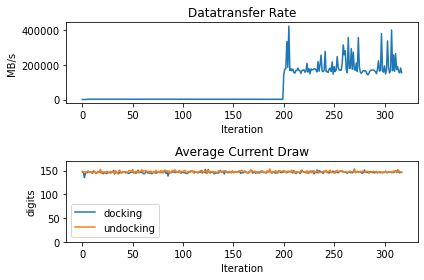

In [16]:
plot_stats(results)

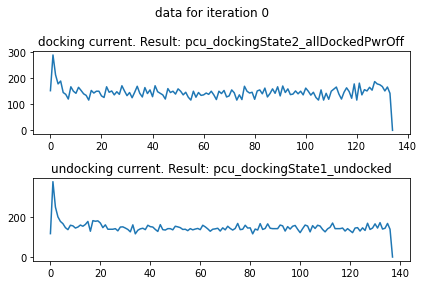

In [8]:
plot_iteration(results, 0)

In [17]:
with open(f'results_300runs_tranferratesMurks_{datetime.now().isoformat()}.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(results, file)

In [4]:
from datetime import datetime
     

'2023-09-21 21-04'

In [10]:
hil.pcu.get_currentlog()

calling pcu with get currentlog


[297,
 232,
 190,
 149,
 153,
 144,
 153,
 143,
 161,
 146,
 148,
 124,
 155,
 159,
 168,
 162,
 176,
 183,
 175,
 144,
 153,
 133,
 154,
 146,
 141,
 147,
 129,
 135,
 146,
 154,
 141,
 148,
 138,
 141,
 139,
 135,
 144,
 135,
 144,
 154,
 148,
 141,
 138,
 143,
 134,
 159,
 152,
 144,
 132,
 133,
 138,
 142,
 133,
 154,
 126,
 128,
 148,
 142,
 144,
 129,
 146,
 143,
 149,
 138,
 140,
 140,
 133,
 143,
 133,
 147,
 160,
 152,
 139,
 136,
 136,
 130,
 158,
 146,
 141,
 139,
 136,
 155,
 116,
 147,
 139,
 125,
 116,
 133,
 135,
 143,
 137,
 134,
 141,
 138,
 138,
 156,
 138,
 145,
 136,
 148,
 140,
 151,
 160,
 136,
 139,
 157,
 163,
 140,
 136,
 154,
 157,
 136,
 138,
 158,
 162,
 143,
 134,
 153,
 154,
 139,
 138,
 164,
 159,
 145,
 133,
 155,
 144,
 141,
 140,
 166,
 151,
 157,
 164,
 142,
 147,
 0]